# Homework 4

### Name: Emma Virnelli
### Collaborator:


DATA 201

Fall 2024

Tufts University

# Part 1 - Linear Regression

### Packages

In [625]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [627]:
#Loading insurance data
fish_data = pd.read_csv('Fish.csv')

#Use info and describe methods to understand dataset
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Question 1
(a) Read in 'Fish.csv' as a dataframe. How many different species of fish does the dataset contain? Use the LabelEncoder to transform the species column. 

In [630]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Check the number of fish species by only getting the unique values and then print them out
num_species = fish_data['Species'].nunique()
print(f"There are {num_species} fish species")

# Use the LabelEncoder to transform the species column
le = LabelEncoder()
fish_data['Species'] = le.fit_transform(fish_data['Species'])

# Check data
fish_data.head()


There are 7 fish species


,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


(b) Separate the dataframe into an $X$ and $y$ variable, for this data our response variable / predicted variable is going to be the column 'Weight'. 

In [633]:
# Seperating target variable (y) and feature variables (x) for the model
# Define the target variable, going to be the column weight
Y = fish_data['Weight']

# Define the feature variables (just drop the weight column)
X = fish_data.drop(columns=['Weight'])

print(X)
print(Y)


     Species  Length1  Length2  Length3   Height   Width
0          0     23.2     25.4     30.0  11.5200  4.0200
1          0     24.0     26.3     31.2  12.4800  4.3056
2          0     23.9     26.5     31.1  12.3778  4.6961
3          0     26.3     29.0     33.5  12.7300  4.4555
4          0     26.5     29.0     34.0  12.4440  5.1340
..       ...      ...      ...      ...      ...     ...
154        5     11.5     12.2     13.4   2.0904  1.3936
155        5     11.7     12.4     13.5   2.4300  1.2690
156        5     12.1     13.0     13.8   2.2770  1.2558
157        5     13.2     14.3     15.2   2.8728  2.0672
158        5     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]
0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64


(c) Split the $X$ and $y$ data into train and test sets (with test_size = 20), and run linear regression on the train set. 

In [636]:
# Split into train and test sets (with test_size = 20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 42)

# Run linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)

coefficients = lm.coef_
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
print(coeff_df)

         Coefficient
Species    29.620743
Length1     3.038268
Length2    67.139908
Length3   -44.913237
Height     41.761876
Width      -0.295327


(d) Report the MSE and r^2 metrics for the test set.

In [639]:
# Predictions on Test Data
test_predictions = lm.predict(X_test)

# MSE
mse = mean_squared_error(Y_test, test_predictions)
print(f"MSE metrics: {mse}")

#r^2 
r2 = r2_score(Y_test, test_predictions)
print(f"r^2 metrics: {r2}")

MSE metrics: 13727.816553006542
r^2 metrics: 0.9034878699241472


## Question 2
Write a function that will compute the MSE of a set of true variables and its corresponding predicted variables. This function should take in two variables, a y_test set and a y_pred set, and it should return a single number. Test to see if your function gives the same output as the built in MSE function.

In [642]:
# Use the same code from question 1C
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Include the y predictor variable
y_pred = lm.predict(X_test)

# Used the set of true variables and its corresponding predicted variable that was previously utilized
lm = LinearRegression()
lm.fit(X_train, Y_train

# Compute the MSE of a set of true variables and its corresponding predicted variables
def mse(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.square(np.subtract(y_test, y_pred)).mean()

# Test to see if my function gives the same output as the built in MSE function
my_MSE = mse(Y_test, y_pred)
print("Custom MSE:", my_MSE)

builtin_MSE = mean_squared_error(Y_test, y_pred)
print("Built-in MSE:", builtin_MSE)


SyntaxError: '(' was never closed (3514440195.py, line 11)

## Question 3
Create a heatmap of the correlations between correlations of the $X$ data, comment on the values (are they relatively high, relatively low? Is that expected?)

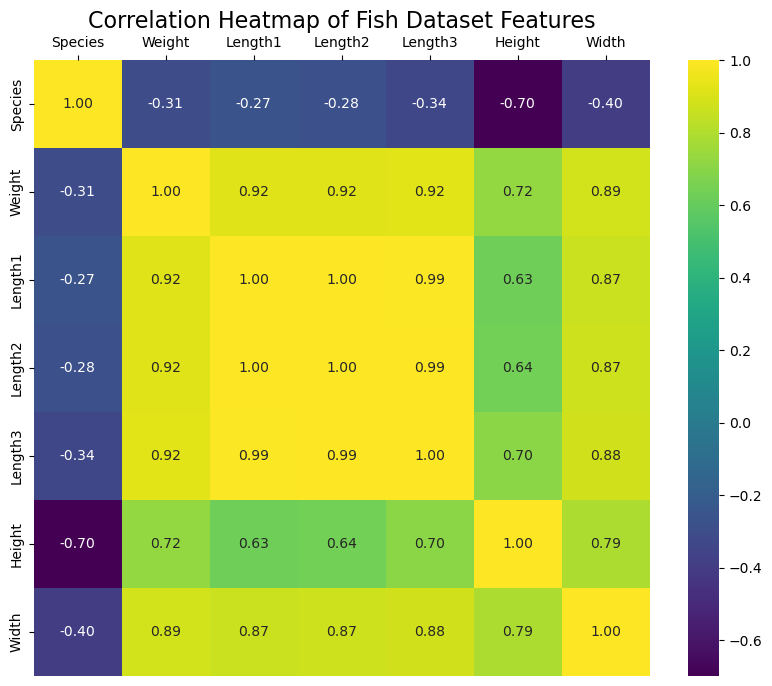

In [645]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn directly with the correlation function
ax = sns.heatmap(fish_data.corr(), annot=True, fmt=".2f", cmap='viridis', square=True)

# Set labels for axes and format the ticks
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()  
ax.set_title('Correlation Heatmap of Fish Dataset Features', fontsize=16)

# Show the plot
plt.show()

A correlation heatmap shows that the correlation between the two features can be relatively high,especially with values near +1 meaning they move together and values near 0 meaning they are not related. Strong relationships between features are expected and I am not surprised by the weeke correlations that are towards the edge of the heatmap.

# Part 2 - Logistic Regression 
We will go over Logistic Regression ROC and AUC, and the RFECV function. The data we are using is the csv named 'surfs_up.csv'. This data has seven columns of data long with a binary classification. Each column represents a certain attribute of the days conditions, and the binary classification is whether it is a good day to surf or not (subjectively picked by the person who made the dataset). The columns, in order of appearance, are as follows:

Air Temperature, in Fahrenheit


Wind Gust, in meters per second


Average Wave Period, in seconds


Wind Speed, in meters per second


Wave Height, in feet


Water Temperature, in Fahrenheit


Dominant Wave Period, in seconds

### Packages

In [650]:
import pandas as pd
from sklearn import metrics

## Question 1 - Get to know the data
(a) Load in the data 'surfsup.csv' into a dataframe, and remove the two blank columns. 

In [653]:
# Load the data into a DataFrame
surf_data = pd.read_csv('surfs_up.csv')

# Remove the two blank columns
surf_data = surf_data.dropna(axis=1, how='all')

# Display the first few rows of the dataframe to confirm changes
print(surf_data.head())


    3.7625  12.37916667   4.42125  10.35833333  5.1591209       45.5  \
0   8.5550    12.970833  4.278000    11.254167   4.921260  44.384000   
1  22.0550    10.158333  3.908095     8.995833   3.790933  43.935714   
2  28.0700    14.495833  5.226667    12.787500   9.072206  43.981250   
3  18.2600    20.779167  6.984783    18.000000  13.118367  44.466957   
4   6.2075    19.037500  5.572500    16.233333   9.594220  43.757273   

     5.39375  0  
0   5.228000  0  
1   4.502857  0  
2   6.241667  0  
3  10.050870  0  
4   6.553864  0  


(b) Rename the columns based off of the data description. 

In [656]:
# Rename the columns based off of the data description
surf_data.columns = [
    'Air Temperature', 
    'Wind Gust', 
    'Average Wave Period', 
    'Wind Speed', 
    'Wave Height', 
    'Water Temperature', 
    'Dominant Wave Period', 
    'Packages'
]

# Display the updated data
print(surf_data.head())

   Air Temperature  Wind Gust  Average Wave Period  Wind Speed  Wave Height  \
0           8.5550  12.970833             4.278000   11.254167     4.921260   
1          22.0550  10.158333             3.908095    8.995833     3.790933   
2          28.0700  14.495833             5.226667   12.787500     9.072206   
3          18.2600  20.779167             6.984783   18.000000    13.118367   
4           6.2075  19.037500             5.572500   16.233333     9.594220   

   Water Temperature  Dominant Wave Period  Packages  
0          44.384000              5.228000         0  
1          43.935714              4.502857         0  
2          43.981250              6.241667         0  
3          44.466957             10.050870         0  
4          43.757273              6.553864         0  


(c) Report how many of each class there is.

In [661]:
# Report how many of each class there is
class_counts = surf_data['Packages'].value_counts()
print("Class counts:")
print(class_counts)

Class counts:
Packages
0    101
1     98
Name: count, dtype: int64


## Question 2 - An ROC curve from basic threshold classification
(a) Create a new variable that is just the Dominant Wave Period column, and also create a response column variable. 

In [664]:
# Create a new variable that is just the Dominant Wave Period colum
X = surf_data['Dominant Wave Period']

# Create a response column variable
# Define the threshold for conditions, which will be 10
threshold_wave_period = 10

# Create the response column variable
surf_data['Response'] = (surf_data['Dominant Wave Period'] > threshold_wave_period).astype(int)

# Assign the response column variable
Y = surf_data['Response']

(b) Create a function that takes in a Series and a threshold, and returns a series of predictions based off of the threshold (1 for above the threshold, 0 for below it). 

In [678]:
# Create a function that takes in a Series and a threshold
def get_predictions(series, threshold):
    return (series > threshold).astype(int)

(c) Create a linear range of 10 points in the actual range of the data, run your function on each point as your threshold value, and at each point find the TPR and FPR associated with the threshold. 

In [681]:
import numpy as np
from sklearn import metrics

# Create a linear range of 10 points in the actual range of the data
thresholds = np.linspace(surf_data['Dominant Wave Period'].min(), surf_data['Dominant Wave Period'].max(), 10)

# Initialize lists for TPR and FPR values
tpr_list = []
fpr_list = []

# Run get_predictions function on each point of threshold value
for threshold in thresholds:
    y_pred = get_predictions(surf_data['Dominant Wave Period'], threshold)
    tn, fp, fn, tp = metrics.confusion_matrix(surf_data['Response'], y_pred).ravel()
    
    # Calculate TPR  and FPR 
    tpr = tp / (tp + fn)  
    fpr = fp / (fp + tn)  
    
    # Append the results to the lists
    tpr_list.append(tpr)
    fpr_list.append(fpr)


(d) Plot the points as pairs (FPR,TPR), but first sorting by FPR. 

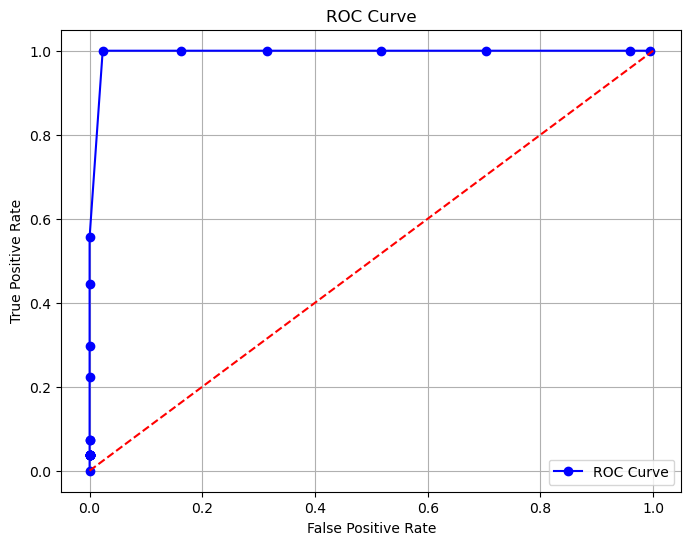

In [712]:
import matplotlib.pyplot as plt

# Sorted by FPR
sorted_indices = np.argsort(fpr_list)
fpr_sorted = np.array(fpr_list)[sorted_indices]
tpr_sorted = np.array(tpr_list)[sorted_indices]

# Plot the points as pairs (FPR,TPR)
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


(e) Repeat part (c) and (d) except for 25 different thresholds in the range.

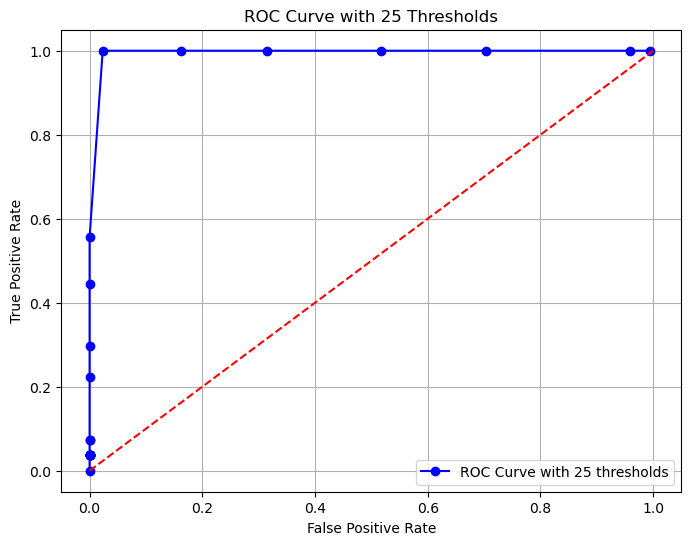

In [710]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Same, but with 25 thresholds
thresholds = np.linspace(surf_data['Dominant Wave Period'].min(), surf_data['Dominant Wave Period'].max(), 25)

tpr_list = []
fpr_list = []

for threshold in thresholds:
    y_pred = get_predictions(surf_data['Dominant Wave Period'], threshold)
    tn, fp, fn, tp = metrics.confusion_matrix(surf_data['Response'], y_pred).ravel()
    tpr = tp / (tp + fn)  
    fpr = fp / (fp + tn)  
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot the ROC curve for the 25 thresholds
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', color='b', label='ROC Curve with 25 thresholds')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 25 Thresholds')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Question 3 - One-Dim Logistic Regression
(a) Run a logistic regression on the single column we were using in Q2, using a testsize of 0.3. Create and display the confusion matrix, report the accuracy. 

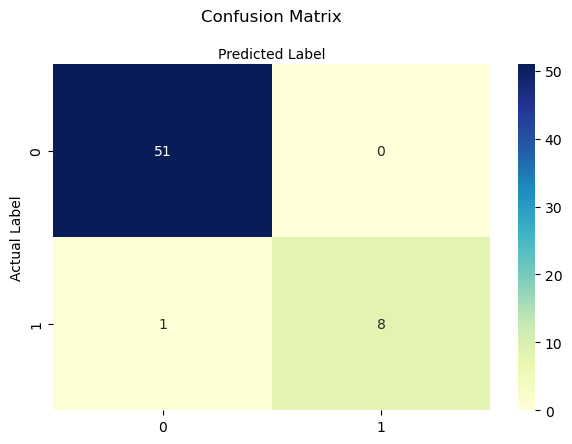

Accuracy: 0.98


In [690]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Use the dat from Q2 again
X = surf_data[['Dominant Wave Period']]  
threshold_wave_period = 10
surf_data['Response'] = (surf_data['Dominant Wave Period'] > threshold_wave_period).astype(int)
y = surf_data['Response']

# Split the data, using a testsize of 0.3.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data before beginning the logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run a logistic regression on the single column 
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Create the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]  
fig, ax = plt.subplots(figsize=(6, 4))
tick_marks = np.arange(len(class_names))  
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap with the confusion matrix data and label the data
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Display the confusion matrix
plt.show()

# Report the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


(b) Pull the coefficient and intercept out of the model and transform the Series based off of the sigmoid function. Plot the transformed data against the original data, i.e. the series will be the x variable and the transformed data will be the y data. What is a reasonable decision threshold here? 

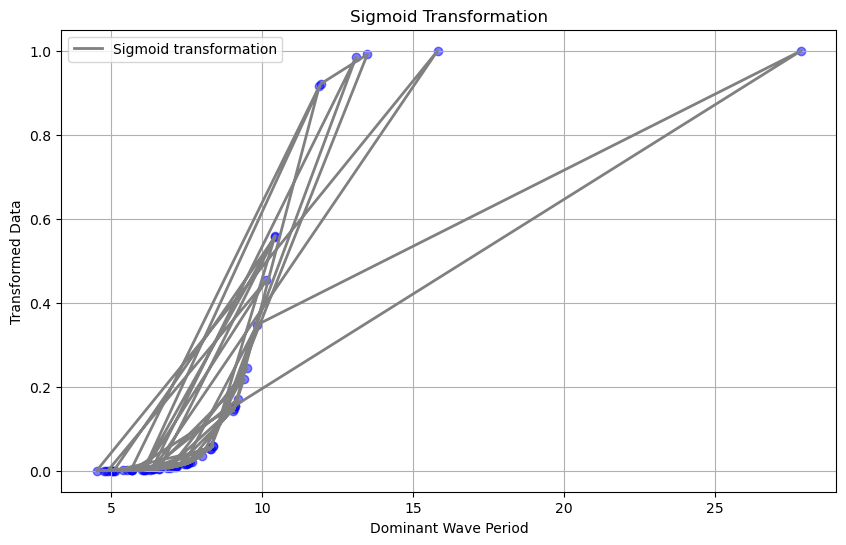

In [716]:
import numpy as np
import matplotlib.pyplot as plt

#Pull the coefficient and intercept out of the model and transform the Series based off of the sigmoid function
intercept = logreg.intercept_[0]  
coefficient = logreg.coef_[0][0]  

# Calculate the linear combinations for each x variable and the flatten for 1D
logits = intercept + coefficient * X_test_scaled.flatten()  

# Apply sigmoid function
y_pred_prob = 1 / (1 + np.exp(-logits))

# Plot the transformed data against the original data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_pred_prob, color='blue', alpha=0.5)
plt.plot(X_test, y_pred_prob, color='gray', label='Sigmoid transformation', linewidth=2)
plt.xlabel('Dominant Wave Period')
plt.ylabel('Transformed Data')
plt.title('Sigmoid Transformation')
plt.legend()
plt.grid(True)
plt.show()

Since the answers are on the lower side, I would say a reasonable threshold would be .3 so you could capture the positive class for most of the samples below that.

(c) Plot the ROC curve for the model and report the AUC.

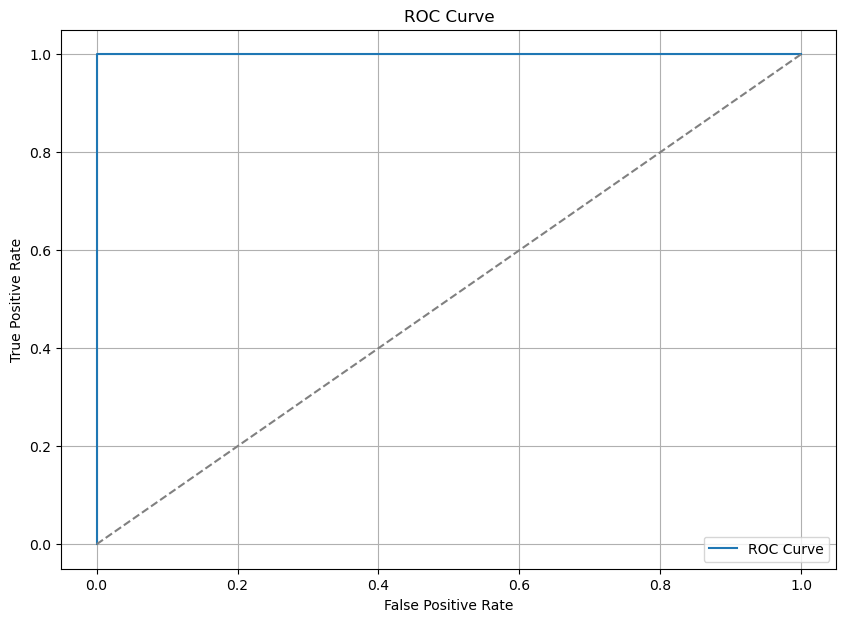

AUC: 1.00


In [722]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predicted probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Define thresholds
thresholds = np.linspace(0, 1, 101)

# Arrays to store FPR and TPR
fpr = []
tpr = []

# Go thrrough each threshold iteration
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate FPR and TPR
    fpr.append(fp / (fp + tn))  
    tpr.append(tp / (tp + fn))  #

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


# Report the AUC
print(f"AUC: {auc:.2f}")
